# 10000 Movies 1915-2023 Dataset

In [1]:
# import kaggle
# !kaggle datasets download -d willianoliveiragibin/10000-data-about-movies-1915-2023

In [2]:
# import zipfile
# with zipfile.ZipFile('10000-data-about-movies-1915-2023.zip', 'r') as zip_ref:
#     zip_ref.extractall('datasets/10000-data-about-movies-1915-2023/')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import os
os.listdir('datasets/10000-data-about-movies-1915-2023/')

['data.csv', 'LICENSE', 'README.md', 'scraper.ipynb']

In [5]:
df = pd.read_csv('datasets/10000-data-about-movies-1915-2023/data.csv', index_col='Unnamed: 0')
df.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [6]:
df.columns

Index(['Movie Name', 'Year of Release', 'Run Time in minutes', 'Movie Rating',
       'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification', 'Director',
       'Stars', 'Description'],
      dtype='object')

In [7]:
df.shape

(10000, 12)

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Movie Name             9632
Year of Release         107
Run Time in minutes     171
Movie Rating             44
Votes                  9304
MetaScore                93
Gross                  4173
Genre                   425
Certification            24
Director               4162
Stars                  9947
Description            9996
dtype: int64

In [10]:
df['Movie Name'].duplicated().sum()

368

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie Name           10000 non-null  object 
 1   Year of Release      10000 non-null  int64  
 2   Run Time in minutes  10000 non-null  int64  
 3   Movie Rating         10000 non-null  float64
 4   Votes                10000 non-null  int64  
 5   MetaScore            7974 non-null   float64
 6   Gross                7085 non-null   float64
 7   Genre                10000 non-null  object 
 8   Certification        9631 non-null   object 
 9   Director             10000 non-null  object 
 10  Stars                10000 non-null  object 
 11  Description          10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1015.6+ KB


Our dataset contains exactly 10,000 unique rows, but then there are 368 movies titles which are duplicated.

## EDA - Columns:

1. Movie Name: The title of the movie.
2. Year of Release: The year of the movie's release. (int)
3. Run Time in minutes: Duration of the movie in minutes. (int)
4. Movie Rating: IMDb user rating. (float)
5. Votes: Number of votes on IMDb. (int)
6. MetaScore: Metascore rating.[critic rating] (float)
7. Gross: Gross income of the movie. (float)
8. Genre: Genre(s) of the movie.
9. Certification
10. Director
11. Stars
12. Description

### Movie Name

In [12]:
# let us find the duplicated movie names
df[df['Movie Name'].duplicated()]


,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
266,Drishyam 2,2022,140,8.2,40561,NaN,NaN,"['Crime', ' Drama', ' Mystery']",Not Rated,['Abhishek Pathak'],"['Ajay Devgn', 'Akshaye Khanna', 'Tabu', 'Shri...","['A', 'gripping', 'tale', 'of', 'an', 'investi..."
269,Drishyam,2015,163,8.2,90954,NaN,740000.0,"['Crime', ' Drama', ' Mystery']",Not Rated,['Nishikant Kamat'],"['Ajay Devgn', 'Shriya Saran', 'Tabu', 'Rajat ...","['Desperate', 'measures', 'are', 'taken', 'by'..."
404,The Message,1976,177,8.1,49720,NaN,NaN,"['Biography', ' Drama', ' History']",PG,['Moustapha Akkad'],"['Anthony Quinn', 'Irene Papas', 'Michael Ansa...","['This', 'epic', 'historical', 'drama', 'chron..."
421,Miracle in Cell No. 7,2013,127,8.1,22277,NaN,NaN,"['Comedy', ' Drama']",NaN,['Hwan-kyung Lee'],"['Seung-ryong Ryu', 'Kal So-won', 'Dal-su Oh',...","['A', 'story', 'about', 'the', 'love', 'betwee..."
797,Beauty and the Beast,1946,93,7.9,27524,92.0,300000.0,"['Drama', ' Fantasy', ' Romance']",Not Rated,"['Jean Cocteau', 'René Clément']","['Jean Marais', 'Josette Day', 'Mila Parély', ...","['A', 'beautiful', 'young', 'woman', 'takes', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,Fame,2009,107,5.0,16770,39.0,22460000.0,"['Drama', ' Musical', ' Romance']",PG,['Kevin Tancharoen'],"['Kelsey Grammer', 'Bebe Neuwirth', 'Megan Mul...","['An', 'updated', 'version', 'of', 'the', 'mus..."
9943,Awake,2021,96,4.9,24851,35.0,NaN,"['Action', ' Adventure', ' Drama']",TV-MA,['Mark Raso'],"['Gina Rodriguez', 'Ariana Greenblatt', 'Luciu...","['After', 'a', 'devastating', 'global', 'event..."
9946,Poltergeist,2015,93,4.9,60069,47.0,47430000.0,"['Horror', ' Thriller']",PG-13,['Gil Kenan'],"['Sam Rockwell', 'Rosemarie DeWitt', 'Kennedi ...","['A', 'family', 'whose', 'suburban', 'home', '..."
9989,The Vault,2017,91,4.9,13449,50.0,10000.0,"['Crime', ' Horror', ' Mystery']",Not Rated,['Dan Bush'],"['James Franco', 'Scott Haze', 'Taryn Manning'...","['Two', 'estranged', 'sisters', 'are', 'forced..."


In [13]:
df[df['Movie Name']=='Drishyam']

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
215,Drishyam,2013,160,8.3,43127,NaN,NaN,"['Crime', ' Drama', ' Thriller']",Not Rated,['Jeethu Joseph'],"['Mohanlal', 'Meena', 'Asha Sharath', 'Ansiba']","['A', 'man', 'goes', 'to', 'extreme', 'lengths..."
269,Drishyam,2015,163,8.2,90954,NaN,740000.0,"['Crime', ' Drama', ' Mystery']",Not Rated,['Nishikant Kamat'],"['Ajay Devgn', 'Shriya Saran', 'Tabu', 'Rajat ...","['Desperate', 'measures', 'are', 'taken', 'by'..."


In [14]:
df[df['Movie Name']=='The Vault']

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
6363,The Vault,2021,118,6.4,29057,50.0,NaN,"['Action', ' Adventure', ' Thriller']",R,['Jaume Balagueró'],"['Freddie Highmore', 'Astrid Bergès-Frisbey', ...","['Follows', 'a', 'genius', 'engineering', 'gra..."
9989,The Vault,2017,91,4.9,13449,50.0,10000.0,"['Crime', ' Horror', ' Mystery']",Not Rated,['Dan Bush'],"['James Franco', 'Scott Haze', 'Taryn Manning'...","['Two', 'estranged', 'sisters', 'are', 'forced..."


In [15]:
df[df['Movie Name']=='Fame']

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
5605,Fame,1980,134,6.6,24147,58.0,120000.0,"['Drama', ' Music', ' Musical']",R,['Alan Parker'],"['Eddie Barth', 'Irene Cara', 'Lee Curreri', '...","['A', 'chronicle', 'of', 'the', 'lives', 'of',..."
9909,Fame,2009,107,5.0,16770,39.0,22460000.0,"['Drama', ' Musical', ' Romance']",PG,['Kevin Tancharoen'],"['Kelsey Grammer', 'Bebe Neuwirth', 'Megan Mul...","['An', 'updated', 'version', 'of', 'the', 'mus..."


From the above outputs we realise that the names are duplicated due to the remakes, and the pair (Movie Name, Year of Release) could be the primary key

### Year of Release

In [16]:
df['Year of Release'].nunique()

107

<Axes: xlabel='Year of Release'>

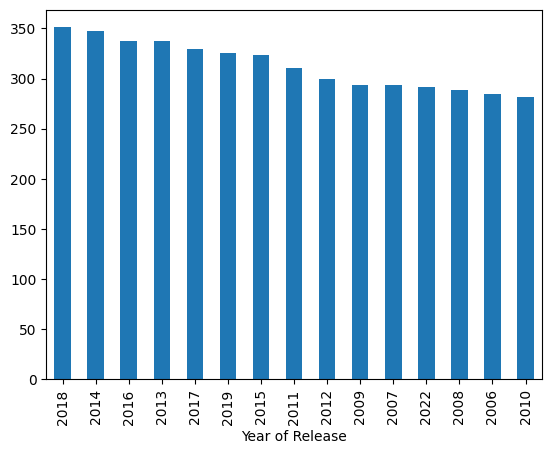

In [17]:
df.groupby('Year of Release').size().sort_values(ascending=False)[:15].plot.bar()

<Axes: xlabel='Year of Release'>

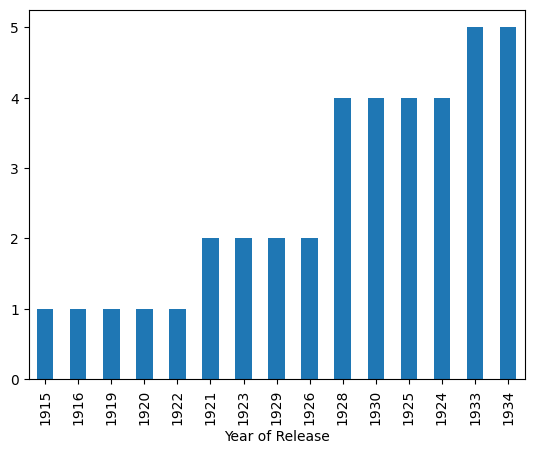

In [18]:
df.groupby('Year of Release').size().sort_values(ascending=True)[:15].plot.bar()

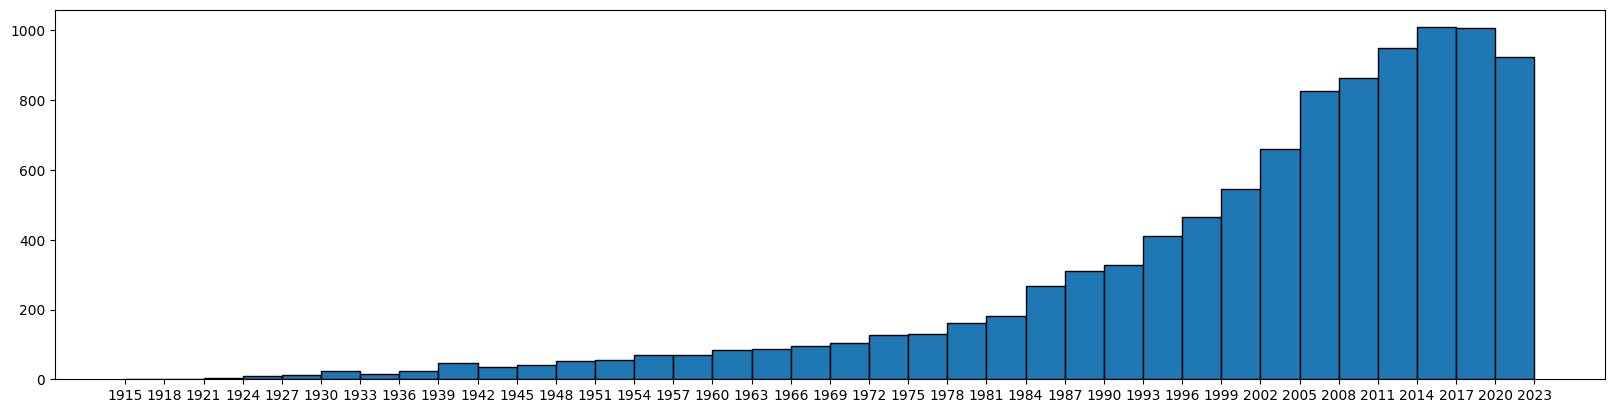

In [19]:
bins= [year for year in range(1915,2024,3)]
plt.figure().set_figwidth(20)
plt.hist(df['Year of Release'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

There is clearly a trend on more movies releasing every year.

### Run Time in minutes

In [20]:
df['Run Time in minutes'].max(), df['Run Time in minutes'].min()

(439, 45)

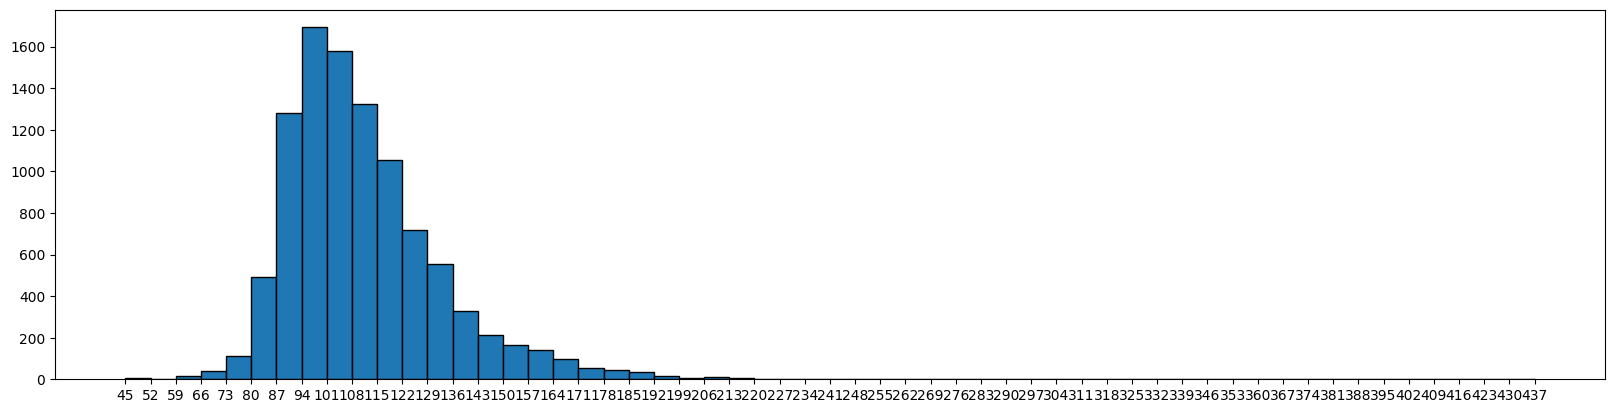

In [21]:
bins= [mins for mins in range(45,440,7)]
plt.figure().set_figwidth(20)
plt.hist(df['Run Time in minutes'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

Most of the movies have run-time between 90-110

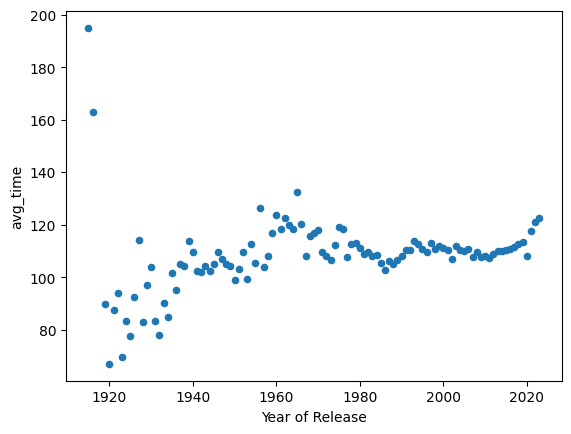

In [22]:
# let's look at avg run-time vs year
df_temp = df.groupby('Year of Release', as_index=False).agg(avg_time=('Run Time in minutes', 'mean'))
df_temp.plot(x='Year of Release', y='avg_time', kind='scatter')

plt.show()

The average movie run time hasn't changed since the 1960s 

### Movie Rating, Votes & MetaScore

In [23]:
print(f"The highest movie rating given is {df['Movie Rating'].max()} and for {df[df['Movie Rating'] == df['Movie Rating'].max()]['Movie Name'][0]}")
print(f"The lowest movie rating given is {df['Movie Rating'].min()} and for {len(df[df['Movie Rating'] == df['Movie Rating'].min()])} movies")

The highest movie rating given is 9.3 and for The Shawshank Redemption
The lowest movie rating given is 4.9 and for 70 movies


In [24]:
print(f"The highest votes given is {df['Votes'].max()} and for {df[df['Votes'] == df['Votes'].max()]['Movie Name'][0]}")
print(f"The lowest votes given is {df['Votes'].min()} and for {df[df['Votes'] == df['Votes'].min()]['Movie Name'][4874]}")

The highest votes given is 2804443 and for The Shawshank Redemption
The lowest votes given is 10002 and for Jane Eyre


In [25]:
higest_metascore_movies = ', '.join(df[df['MetaScore'] == df['MetaScore'].max()]['Movie Name'].astype(str).values.flatten())
lowest_metascore_movies = ', '.join(df[df['MetaScore'] == df['MetaScore'].min()]['Movie Name'].astype(str).values.flatten())
print(f"The highest metascore given is {df['MetaScore'].max()} and for {higest_metascore_movies}")
print(f"The lowest movie rating given is {df['MetaScore'].min()} and for {lowest_metascore_movies}")

The highest metascore given is 100.0 and for The Godfather, Casablanca, Rear Window, Vertigo, Citizen Kane, Lawrence of Arabia, Tokyo Story, Three Colors: Red, Fanny and Alexander, The Leopard, Sweet Smell of Success, Boyhood, Notorious, The Conformist, Journey to Italy
The lowest movie rating given is 7.0 and for Miss March


<Figure size 1200x1200 with 0 Axes>

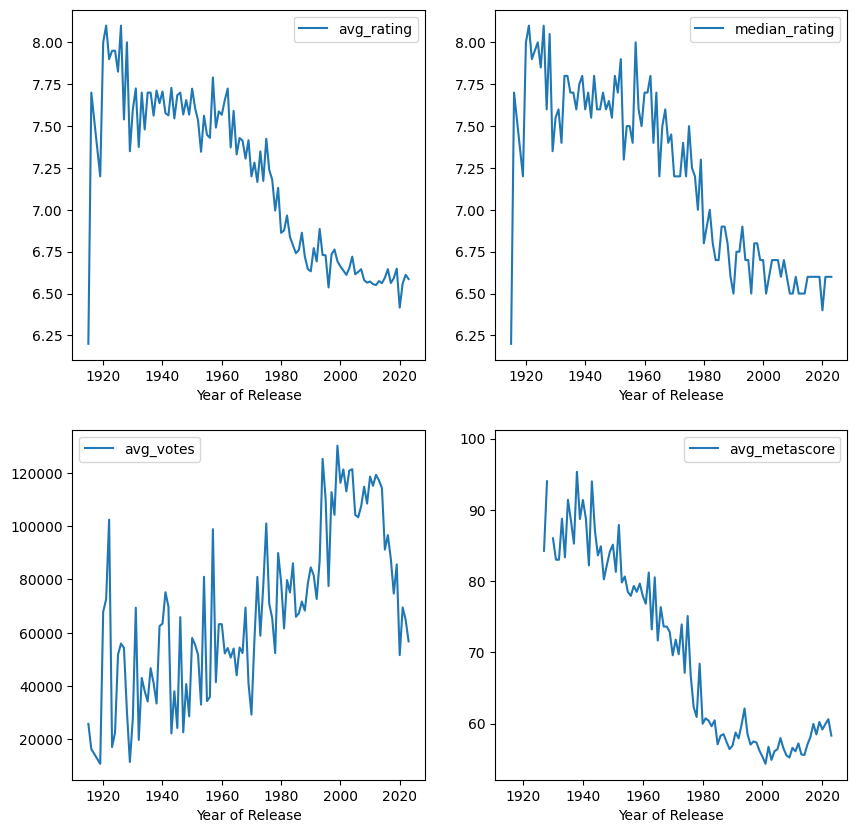

In [26]:
plt.figure(figsize=(12, 12))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# year of release vs avg rating
df_temp = df.groupby('Year of Release', as_index=False).agg(avg_rating=('Movie Rating', 'mean'))
df_temp.plot(x='Year of Release', y='avg_rating', kind='line',ax=axes[0,0])

# year of release vs median rating
df_temp = df.groupby('Year of Release', as_index=False).agg(median_rating=('Movie Rating', 'median'))
df_temp.plot(x='Year of Release', y='median_rating', kind='line', ax=axes[0,1])

# year of release vs avg metascore
df_temp = df.groupby('Year of Release', as_index=False).agg(avg_votes=('Votes', 'mean'))
df_temp.plot(x='Year of Release', y='avg_votes', kind='line', ax=axes[1,0])

# year of release vs avg metascore
df_temp = df.groupby('Year of Release', as_index=False).agg(avg_metascore=('MetaScore', 'mean'))
df_temp.plot(x='Year of Release', y='avg_metascore', kind='line', ax=axes[1,1])

plt.show()

The above plots help us conclude that over time the movies have gotten popular but lost their quality as the average critic rating and imdb rating as gone down

<Figure size 1200x1200 with 0 Axes>

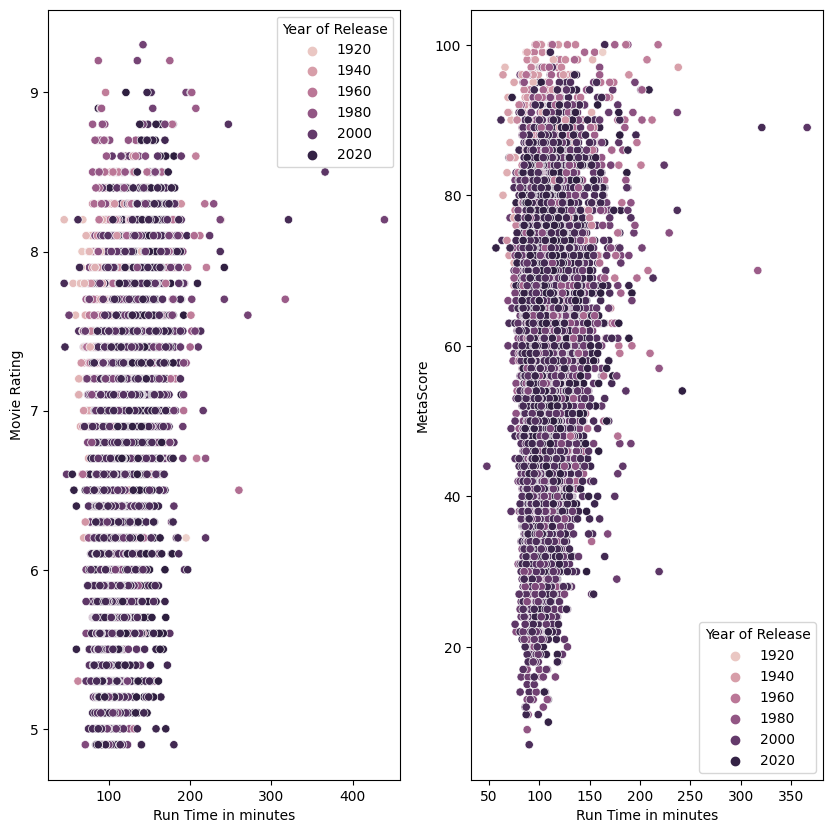

In [27]:
# Run time vs rating 
plt.figure(figsize=(12, 12))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.scatterplot(data=df, x='Run Time in minutes', y='Movie Rating', hue='Year of Release', ax=axes[0])
sns.scatterplot(data=df, x='Run Time in minutes', y='MetaScore', hue='Year of Release', ax=axes[1])
plt.show()

### Gross

In [28]:
print(f"The Gross of {100.0*df['Gross'].isna().sum()/len(df):.2f}% movies are not available in the data")

The Gross of 29.15% movies are not available in the data


<Figure size 1200x1200 with 0 Axes>

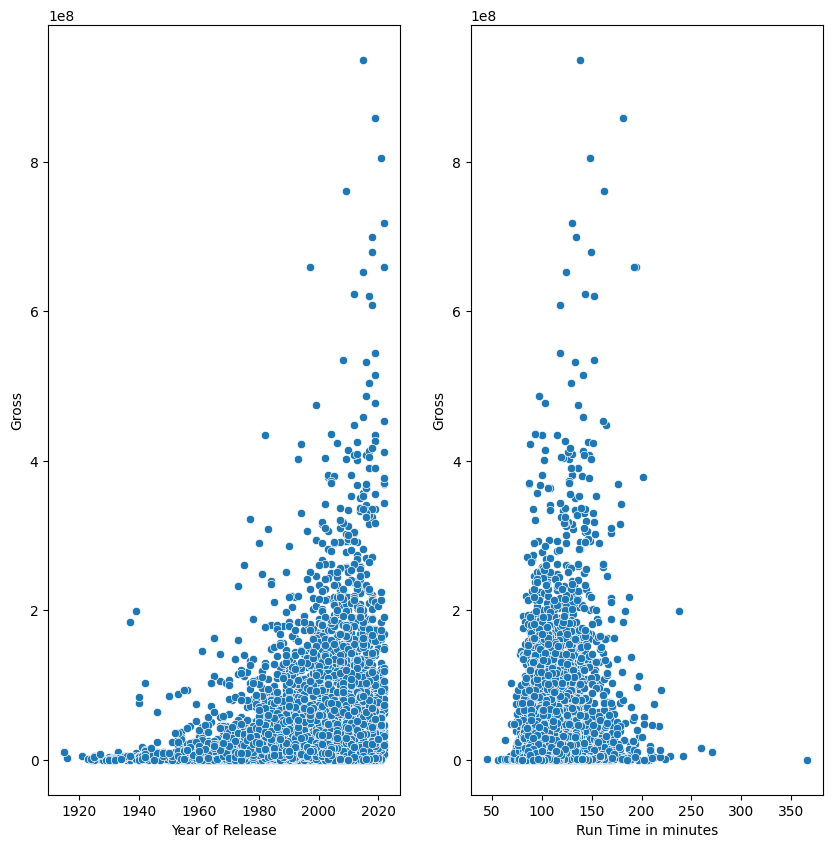

In [29]:
# Gross vs year
plt.figure(figsize=(12, 12))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.scatterplot(data=df, x='Year of Release', y='Gross', ax=axes[0])
sns.scatterplot(data=df, x='Run Time in minutes', y='Gross', ax=axes[1])
plt.show()

The more recent movies make more gross revenue than the older ones 

<Axes: ylabel='Gross'>

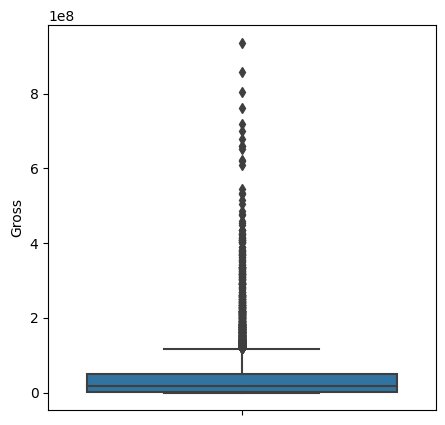

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, y='Gross')

In [31]:
Q1 = df['Gross'].quantile(0.25)
Q3 = df['Gross'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Q1, Q3, IQR, lower_bound, upper_bound

(2340000.0, 48640000.0, 46300000.0, -67110000.0, 118090000.0)

In [32]:
print(f"There are {(df['Gross']>upper_bound).sum()} movies that made abnormally high gross revenue, with each of them grossing over ${upper_bound:,}")

There are 589 movies that made abnormally high gross revenue, with each of them grossing over $118,090,000.0


In [33]:
print(f"There are {(df['Gross']<lower_bound).sum()} movies that made abnormally low gross revenue")

There are 0 movies that made abnormally low gross revenue


### Genre                

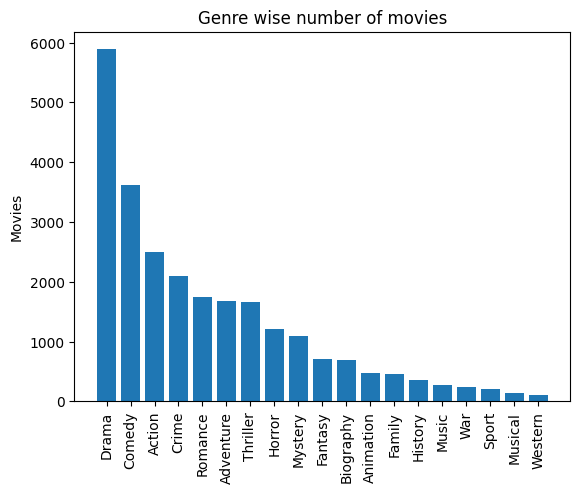

In [34]:
import re
genre_dict = {}

for genres in df.Genre:
    match = r"'\s?(\w+)'"
    for genre in re.findall(match,genres):
        if genre not in genre_dict.keys():
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1
            
genre_dict = dict(sorted(genre_dict.items(), key=lambda item: item[1], reverse=True))
fig, ax = plt.subplots() 
plt.bar(range(len(genre_dict)), list(genre_dict.values()), align='center')
plt.xticks(range(len(genre_dict)), list(genre_dict.keys()))
plt.ylabel("Movies")
plt.title('Genre wise number of movies')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

Genre column contains list of genres the movie belongs to

In [35]:
df.columns

Index(['Movie Name', 'Year of Release', 'Run Time in minutes', 'Movie Rating',
       'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification', 'Director',
       'Stars', 'Description'],
      dtype='object')

### Certification, Director, Stars, Description

In [36]:
df.Certification.isna().sum()

369

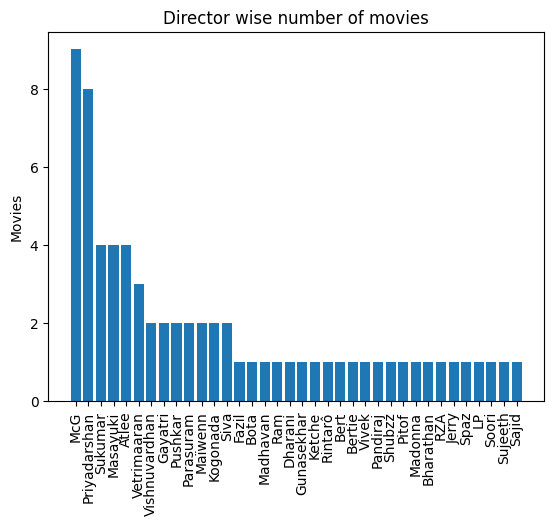

In [37]:
df.Director
import re
director_dict = {}

for directors in df.Director:
    match = r"'\s?(\w+)'"
    for director in re.findall(match,directors):
        if director not in director_dict.keys():
            director_dict[director] = 1
        else:
            director_dict[director] += 1
            
director_dict = dict(sorted(director_dict.items(), key=lambda item: item[1], reverse=True))
fig, ax = plt.subplots() 
plt.bar(range(len(director_dict)), list(director_dict.values()), align='center')
plt.xticks(range(len(director_dict)), list(director_dict.keys()))
plt.ylabel("Movies")
plt.title('Director wise number of movies')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

In [38]:
gross_ = 0
for i in range(11):
    gross_ += df[df.Director.str.contains("'"+list(director_dict.keys())[i]+"'")]['Gross'].values.sum()
print(f"The gross revenue of ${gross_} from all the top 10 directors combined is {100.0*gross_/(df['Gross'].sum()):.2f}%")

The gross revenue of $nan from all the top 10 directors combined is nan%


In [39]:
df.Description

0       ['Over', 'the', 'course', 'of', 'several', 'ye...
1       ['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'...
2       ['An', 'anime', 'adaptation', 'of', 'the', 'Hi...
3       ['Lazy,', 'uneducated', 'students', 'share', '...
4       ['When', 'the', 'menace', 'known', 'as', 'the'...
                              ...                        
9995    ['The', 'gang', 'encounters', 'with', 'some', ...
9996    ['After', 'a', 'lifetime', 'of', 'scams,', 'a'...
9997    ['A', 'father', "doesn't", 'want', 'his', 'thr...
9998    ['An', 'intimate', 'relationship', 'between', ...
9999    ['With', 'the', "world's", 'end', 'imminent,',...
Name: Description, Length: 10000, dtype: object

In [40]:
df_cor = df[['Year of Release','Run Time in minutes','Movie Rating','Votes','MetaScore','Gross']]
cor_mat = df_cor.corr()
cor_mat

,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
Year of Release,1.000000,0.054086,-0.308094,0.059403,-0.250521,0.119349
Run Time in minutes,0.054086,1.000000,0.341893,0.194542,0.218387,0.166924
Movie Rating,-0.308094,0.341893,1.000000,0.309174,0.718538,0.099125
Votes,0.059403,0.194542,0.309174,1.000000,0.201454,0.614231
MetaScore,-0.250521,0.218387,0.718538,0.201454,1.000000,0.044752
Gross,0.119349,0.166924,0.099125,0.614231,0.044752,1.000000


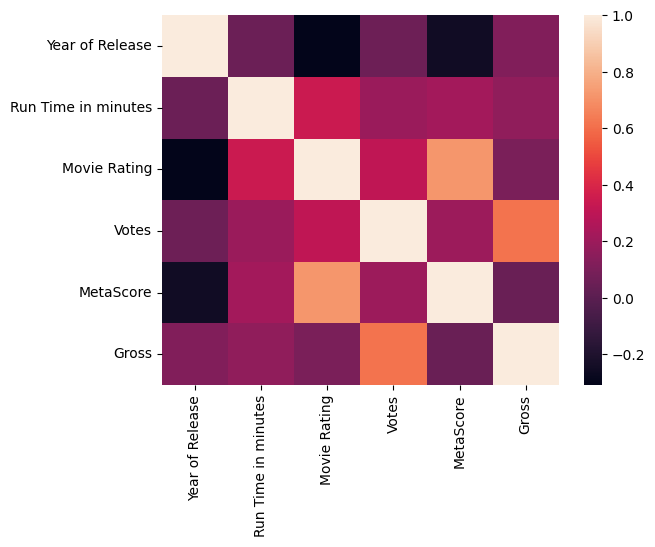

In [41]:
sns.heatmap(cor_mat)
plt.show()

## Prepare models to predict gross

In [42]:
df.isna().sum()

Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [43]:
def preprocessing_no_gross (df_):
    df_['Certification'].fillna(df['Certification'].mode()[0], inplace=True)
    df_['MetaScore'].fillna(df['Movie Rating']*10, inplace=True)
    df_.dropna(subset=['Gross'], inplace=True)
    return df_

In [44]:
df_copy_no_gross = df.copy()
df_copy_no_gross = preprocessing_no_gross(df_copy_no_gross)
df_copy_no_gross.isna().sum()

Movie Name             0
Year of Release        0
Run Time in minutes    0
Movie Rating           0
Votes                  0
MetaScore              0
Gross                  0
Genre                  0
Certification          0
Director               0
Stars                  0
Description            0
dtype: int64

1. feature engg genre - we'll convert top 5 genre to separate columns and flag as 1 if that movie belongs to that genre
2. drop directors - Only 40 out of 7085 movies are directed by the top 10 directors, and they only make upto 0.17%
3. drop movie name
4. drop certification
5. drop stars
6. drop description 

In [45]:
df_copy_no_gross.shape

(7085, 12)

In [46]:
# split the genre column to Drama Comedy Action Crime Romance - Top 5 Genres
def transform_genre(df_):
    top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Romance']
    for genre in top_genres:
        df_[genre] = df_['Genre'].apply(lambda x: 1 if genre in [x.strip() for x in eval(x)] else 0)
    df_ = df_.drop(columns=['Genre'])
    return df_
def drop_cols(df_):
    df_ = df_.drop(columns=['Movie Name','Certification','Director','Stars'])
    return df_
df_copy_no_gross = transform_genre(df_copy_no_gross)
df_copy_no_gross = drop_cols(df_copy_no_gross)
df_copy_no_gross.shape

(7085, 12)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_copy_no_gross = df_copy_no_gross.reset_index(drop=True)
df_copy_no_gross['Description'] = df_copy_no_gross['Description'].str.lower()
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(df_copy_no_gross['Description'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [48]:
tfidf_df.shape, df_copy_no_gross.shape

((7085, 20), (7085, 12))

In [49]:
df_copy_no_gross = df_copy_no_gross.drop(columns='Description')

In [50]:
df_copy_no_gross = pd.concat([df_copy_no_gross, tfidf_df], axis=1)
df_copy_no_gross.shape

(7085, 31)

In [51]:
df_copy_no_gross.duplicated().sum()

0

In [52]:
[x for x in df_copy_no_gross.columns if x != 'Gross']

['Year of Release',
 'Run Time in minutes',
 'Movie Rating',
 'Votes',
 'MetaScore',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Romance',
 'city',
 'family',
 'father',
 'finds',
 'friends',
 'girl',
 'group',
 'help',
 'life',
 'love',
 'man',
 'new',
 'old',
 'school',
 'story',
 'war',
 'wife',
 'woman',
 'world',
 'young']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

X = df_copy_no_gross[[x for x in df_copy_no_gross.columns if x != 'Gross']]
y = df_copy_no_gross['Gross']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, 
                                                      random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, 
                                                              learning_rate=0.1, 
                                                              random_state=42),
    'Support Vector Regression (SVR)': SVR(kernel='linear')
}

In [54]:
for _, (reg_name, reg) in enumerate(regressors.items()):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(reg_name)
    print(f"Mean Squared Error: {mse}")
    print(f"r2 score: {r2}")

Linear Regression
Mean Squared Error: 2893068204180574.0
r2 score: 0.4501601105244958
Random Forest Regression
Mean Squared Error: 2242457676697593.5
r2 score: 0.5738114022589623
Gradient Boosting Regression
Mean Squared Error: 2391644219435214.0
r2 score: 0.5454578667109404
Support Vector Regression (SVR)
Mean Squared Error: 3289257886111293.0
r2 score: 0.3748625801692367
